# Functions definitions and library imports

In [1]:
from SGD_PowerLaw import *
import cv2
# !pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2023-07-03 19:30:13 -03:00)


In [2]:
def transfom_to_geocoordinates(lines, base_offset):
    lines[:,0] = base_offset[0]+lines[:,0]
    lines[:,1] = base_offset[1]-lines[:,1]
    lines[:,2] = base_offset[0]+lines[:,2]
    lines[:,3] = base_offset[1]-lines[:,3]
    return lines

def transfom_to_geocoordinates_point(point, base_offset):
    point[0] = base_offset[0]+point[0]
    point[1] = base_offset[1]-point[1]
    return point

def draw_lines(canvas, lines, x_offset, y_offset, color):
    for i in range(np.shape(lines)[0]): #np.shape(lines)[0]
        line = lines[i]
        canvas = cv2.line(canvas, (int(line[0]+ x_offset), int(line[1]+ y_offset)),
                          (int(line[2]+ x_offset), int(line[3]+ y_offset)), color)
    return canvas

time: 15 ms (started: 2023-07-03 19:30:13 -03:00)


# Loading FreeHand data from Mosis XP

In [3]:
lines = load_lines_from_xpp_file('Gaivota2D.xpp', 0, 0, 0, [])
lines = np.asarray(lines)
segm_group_angles = compute_line_angles(lines)

time: 1.27 s (started: 2023-07-03 19:30:13 -03:00)


D:\envs\sklearn_py39\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


### Dataset 1 rosechart

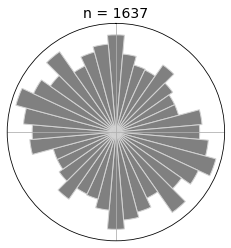

time: 2.52 s (started: 2023-07-01 00:54:37 -03:00)


In [4]:
aux = segm_group_angles[np.where(segm_group_angles[:, 1] >0)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart.pdf')
#cv2.imwrite('rosechart.png', cv2.cvtColor(rosechart_plot, cv2.COLOR_RGB2BGR))

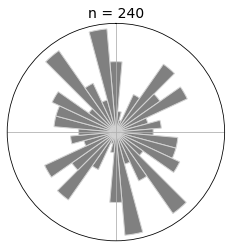

time: 1.95 s (started: 2023-07-01 00:54:39 -03:00)


In [5]:
aux = segm_group_angles[np.where(segm_group_angles[:, 1] > 10)]
rosechart_plot = rosechart(aux[:, 0],  filename='rosechart_10.pdf')
# cv2.imwrite('rosechart_10.png', cv2.cvtColor(rosechart_plot, cv2.COLOR_RGB2BGR))

In [4]:
# lines = np.asarray(lines)
x_offset = np.abs(np.sort([np.min(lines[:,0]), np.min(lines[:,2])])[0])
y_offset = np.abs(np.sort([np.min(lines[:,1]), np.min(lines[:,3])])[0])
# lines[:,0] = lines[:,0] + x_offset
# lines[:,2] = lines[:,2] + x_offset
# lines[:,1] = lines[:,1] + y_offset
# lines[:,3] = lines[:,3] + y_offset
x_max = np.sort([np.max(lines[:,0])+ x_offset, np.max(lines[:,2])+ x_offset])[1]
y_max = np.sort([np.max(lines[:,1])+ y_offset, np.max(lines[:,3])+ y_offset])[1]
lines = lines.round(decimals=3)

time: 0 ns (started: 2023-07-03 19:30:18 -03:00)


In [5]:
base_offset = np.asarray([649188.0, 9384790.0])
position1 = np.asarray([649269.37, 9384756.70])
position2 = np.asarray([649076.94, 9384874.84])
# (base_offset-position1)+np.asarray([x_offset, y_offset])

time: 0 ns (started: 2023-07-03 19:30:18 -03:00)


In [8]:
# print(x_offset-(base_offset[0]-position2[0]))
# print(circle_center1)

time: 0 ns (started: 2023-07-01 00:54:46 -03:00)


## Acquiring datasets 2 and 3 from circular scanlines

In [6]:
# Get fracture traces in scanlines
radius = 50

# circle_center1 = (70, 55)
circle_center1 = [20, 20]
segments_in_circle1 = circular_scanline(lines, circle_center1, radius)

# circle_center2 = (200, 150.0)
circle_center2 = [-110, -70]
segments_in_circle2 = circular_scanline(lines, circle_center2, radius)

(194, 4)
(321, 4)
time: 31 ms (started: 2023-07-03 19:30:22 -03:00)


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:219: RuntimeWarning: invalid value encountered in scalar divide
  u = -b / (2 * a)


### Saving datasets to shapefiles

In [63]:
# save_shapefile('area1', transfom_to_geocoordinates(segments_in_circle1, base_offset), segm_group_angles)
# save_shapefile('area2', transfom_to_geocoordinates(segments_in_circle2, base_offset), segm_group_angles)

### Saving scanline center points to shapefile

In [221]:
# w = shapefile.Writer('points')
# w.field('name', 'C')

# p, q =  transfom_to_geocoordinates_point(circle_center1, base_offset)
# w.point(p, q) 
# w.record('point1')

# p, q =  transfom_to_geocoordinates_point(circle_center2, base_offset)
# w.point(p, q) 
# w.record('point2')

# w.close()

### Ploting empirical datasets

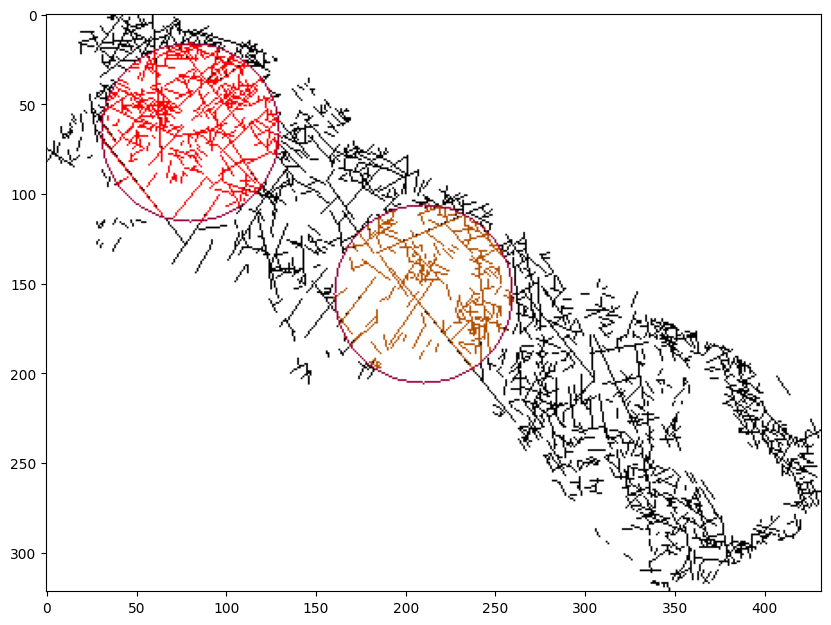

time: 344 ms (started: 2023-06-22 15:35:12 -03:00)


In [9]:
canvas = np.full((int(y_max), int(x_max), 3), 255, np.uint8)
# Draw the segments in the canvas


canvas = draw_lines(canvas, lines, x_offset, y_offset, (0,0,0))
canvas = draw_lines(canvas, segments_in_circle1, x_offset, y_offset, (180,80,0))
canvas = draw_lines(canvas, segments_in_circle2, x_offset, y_offset, (255,0,0))

   
cv2.circle(canvas, np.int32(circle_center1)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)
cv2.circle(canvas, np.int32(circle_center2)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)

plt.figure(figsize=(10,10))
plt.imshow(canvas)

### Ploting rosecharts of datasets 2

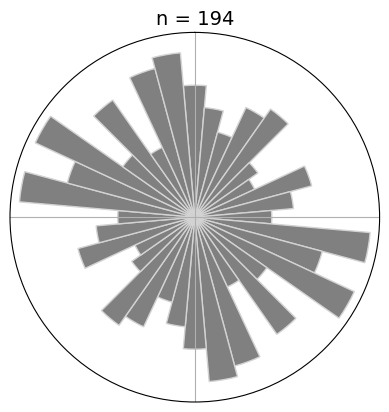

time: 1.23 s (started: 2023-07-03 19:30:34 -03:00)


In [7]:
# Dataset 2
angles2 = compute_line_angles(segments_in_circle1)
rosechart_plot = rosechart(angles2[:, 0], filename='rosechart_dataset2.pdf') # angles[:, 0], angles[:, 1]

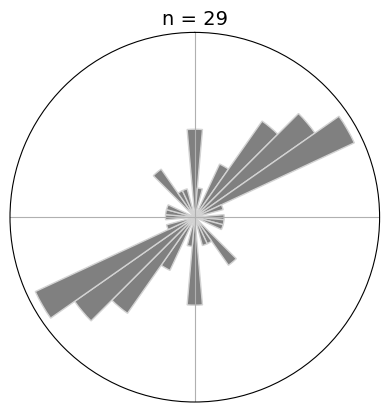

time: 469 ms (started: 2023-07-03 19:30:35 -03:00)


In [8]:
angles2 = compute_line_angles(segments_in_circle1)
aux = segm_group_angles[np.where(angles2[:, 1] > 10)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart_dataset2_10m.pdf')

### Ploting rosecharts of datasets 3

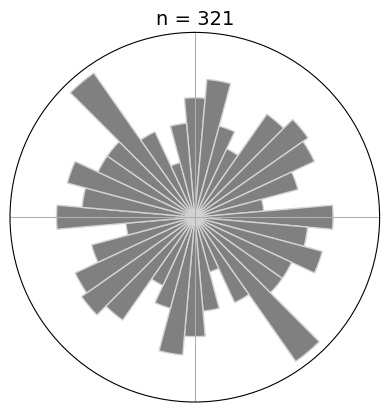

time: 375 ms (started: 2023-07-03 19:30:37 -03:00)


In [9]:
# Dataset 3
angles3 = compute_line_angles(segments_in_circle2)
rosechart_plot = rosechart(angles3[:, 0], filename='rosechart_dataset3.pdf')

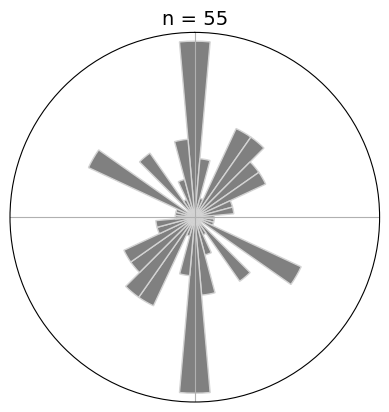

time: 344 ms (started: 2023-07-03 18:49:03 -03:00)


In [25]:
angles3 = compute_line_angles(segments_in_circle2)
aux = segm_group_angles[np.where(angles3[:, 1] > 10)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart_dataset3_10m.pdf')

# Tests with synthetic data

## SGD default settings

In [15]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3
n_seeds = 10

time: 0 ns (started: 2023-06-28 12:03:19 -03:00)


## SGD cost function evaluation

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


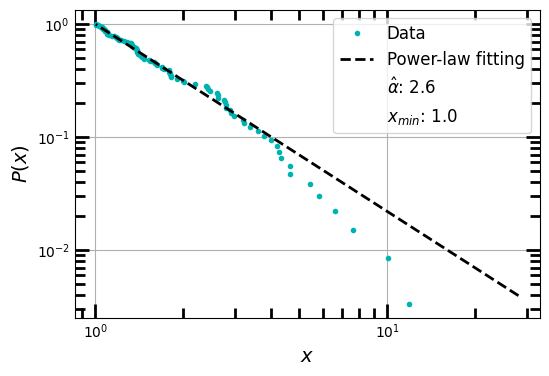

0.995063592745608 99.76 0.32 17.289267590729093 0.4037397922750372
>>> A2 cost function


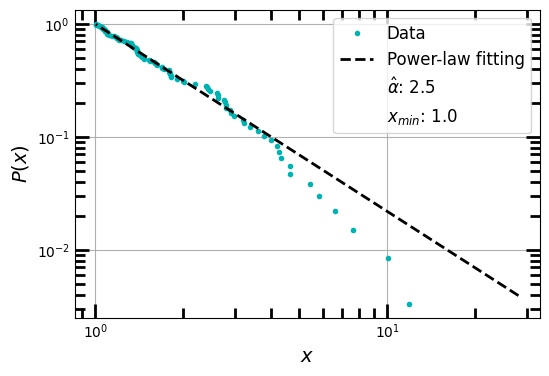

0.995065399397353 99.76 0.3 15.34575279196312 0.40496704691395746
>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


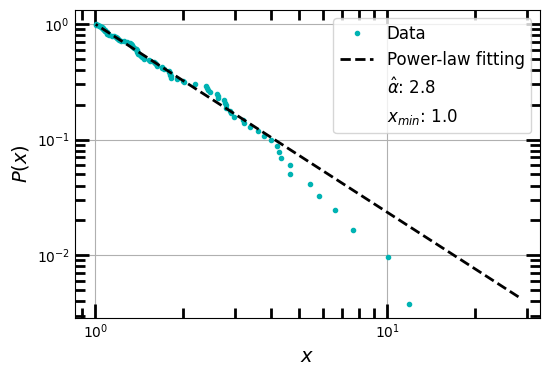

0.9950390356618005 94.39999999999999 0.58 43.70604018420196 0.39559829163195176
>>> KS cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


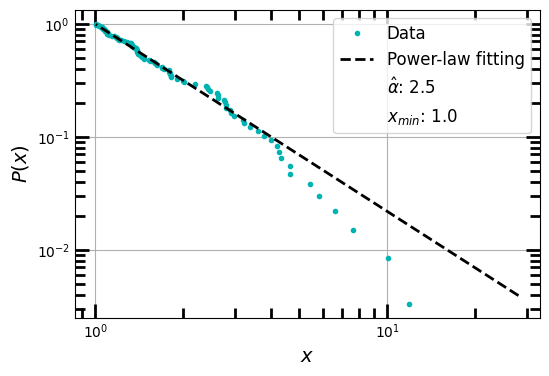

0.9950655796322533 99.72 0.3 15.357569102013704 0.40509425848612135
>>> KS_t cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


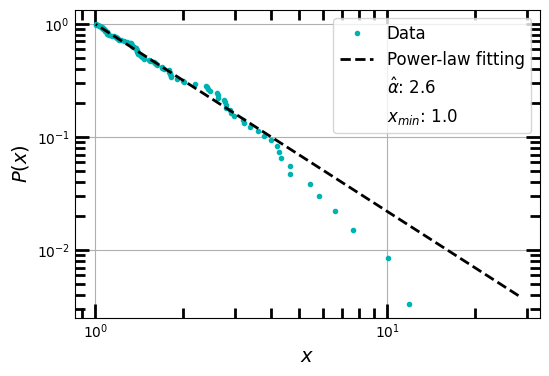

0.9950640649110868 99.76 0.31 16.61091954447181 0.40405214310664156
>>> KS_t_HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


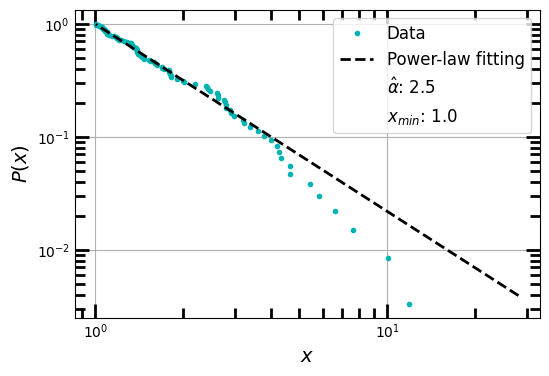

0.995065351612845 99.76 0.3 15.34575279196312 0.4049334658871295
time: 13min 30s (started: 2023-06-28 12:03:24 -03:00)


In [16]:
## Generating synthetic distribution
alpha = 2.5
xmin = 1
# np.random.seed(0)
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)


metric_results = []
fit = powerlaw.Fit(g, xmin=1)
xmin = fit.xmin
alpha = fit.power_law.alpha
r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha, xmin, ks_evaluation=True)
metric_results.append([alpha, r2, ks_t, ks_d, A2, HD])
print(r2, ks_t, ks_d, A2, HD)


for metric in ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']: # ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']

    print('>>> ' + metric + ' cost function')
    results = alpha_estimator2(g, max_iterations, learning_rate, n_seeds,
                              fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
    alpha_history, x_min_history, cost_history = results
    
    alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
    x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
    r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha_sgd, x_min_sgd, ks_evaluation=True, filename=metric+'_fitting.pdf')
    metric_results.append([alpha_sgd, r2, ks_t, ks_d, A2, HD])
    print(r2, ks_t, ks_d, A2, HD)
#     plot_history(n_seeds, cost_history, max_iterations, metric+'_history.pdf')



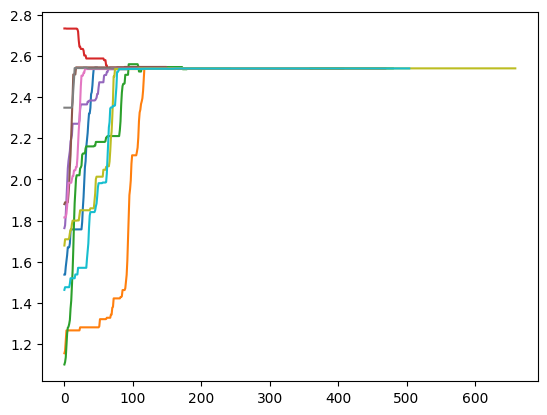

time: 157 ms (started: 2023-06-28 12:34:09 -03:00)


In [17]:
for i in range(n_seeds):
    plt.plot(alpha_history[i][np.where(alpha_history[i]>0)])

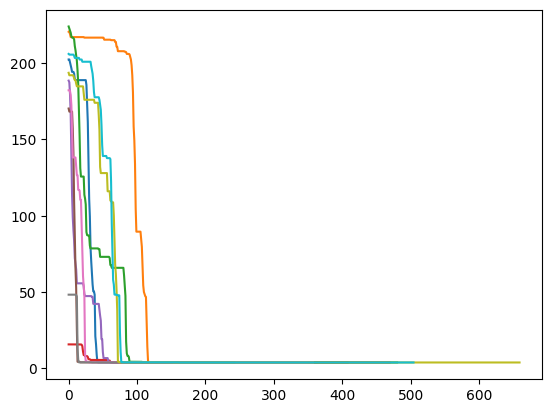

time: 188 ms (started: 2023-06-28 12:34:31 -03:00)


In [18]:
for i in range(n_seeds):
    plt.plot(cost_history[i])

In [19]:
#r2, ks_t, ks_d, A2, HD

metric_text = ['MLE', 'SGD A2', 'SGD HD', 'SGD K-S d', 'SGD K-S t', 'SGD K-S t+HD']

for i in range(6):
  print(metric_text[i], end=' & ')
  for j in range(np.size(metric_results[i])):
    if j != np.size(metric_results[i])-1:
      print(str("%.4f" % metric_results[i][j]), end=' & ')
    else:
      print(str("%.4f" % metric_results[i][j]), end=' \\\ \\hline \n ')

MLE & 2.5571 & 0.9951 & 99.7600 & 0.3200 & 17.2893 & 0.4037 \\ \hline 
 SGD A2 & 2.5394 & 0.9951 & 99.7600 & 0.3000 & 15.3458 & 0.4050 \\ \hline 
 SGD HD & 2.8480 & 0.9950 & 94.4000 & 0.5800 & 43.7060 & 0.3956 \\ \hline 
 SGD K-S d & 2.5377 & 0.9951 & 99.7200 & 0.3000 & 15.3576 & 0.4051 \\ \hline 
 SGD K-S t & 2.5524 & 0.9951 & 99.7600 & 0.3100 & 16.6109 & 0.4041 \\ \hline 
 SGD K-S t+HD & 2.5399 & 0.9951 & 99.7600 & 0.3000 & 15.3458 & 0.4049 \\ \hline 
 time: 0 ns (started: 2023-06-28 12:34:48 -03:00)


### Evaluating cost functions 10 times to obtain average values

2.632833604818021 0.9947123748919959 98.76 0.36 3.5044868013576176 0.40577146412075904
>>> A2 cost function
2.630483747552126 0.9947406290559329 99.72 0.26 5.89013500776779 0.3927604030857571


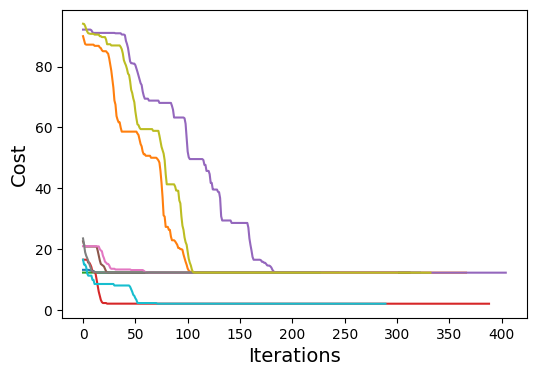

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.8774573570065427 0.9948037661253649 97.2 0.42 23.73622491932183 0.3852237129253116


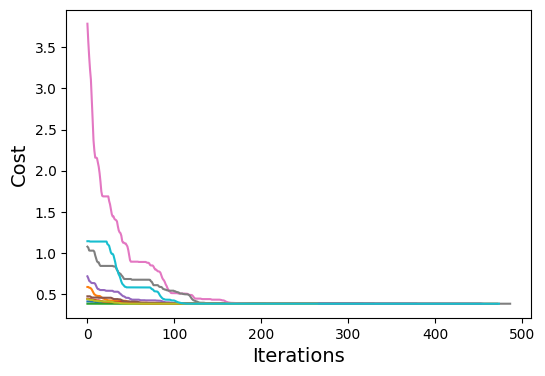

>>> KS cost function
2.611208639994641 0.994736169590656 99.72 0.25 4.880269865981889 0.39418259969162345


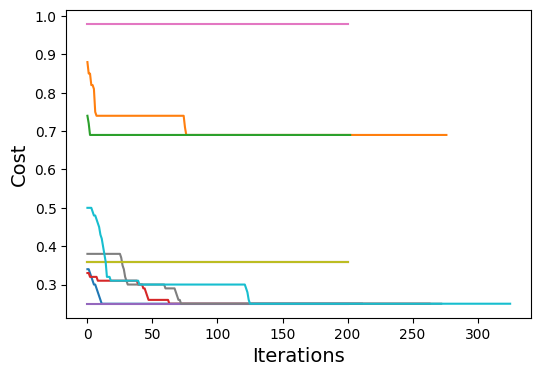

>>> KS_t cost function
2.621048820387949 0.994738435160836 99.76 0.26 5.365363281537144 0.393437350907027


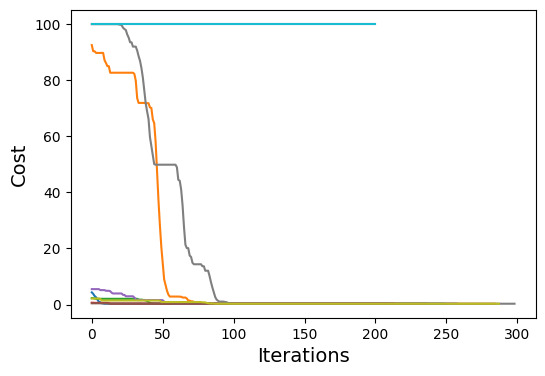

>>> KS_t_HD cost function
2.630661402321164 0.9947406705651073 99.72 0.26 5.89013500776779 0.39274800300160223


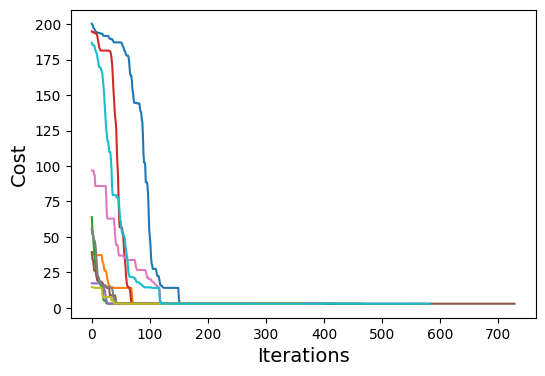

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.5818788426188135 0.9970103830166304 99.56 0.53 7.448939387538666 0.38562150794813194
>>> A2 cost function
2.684009006889033 0.997008557805557 99.44 0.28 10.545404310399887 0.37451377933777136


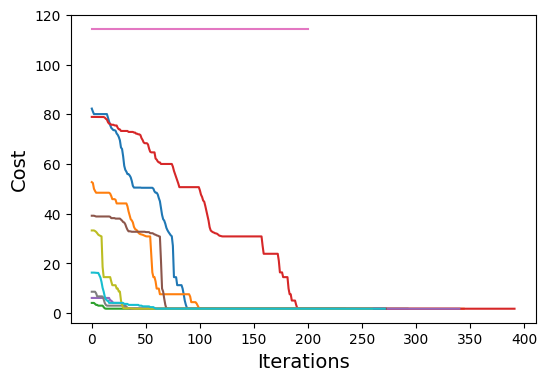

>>> HD cost function
2.7572582013202545 0.9970092952193198 98.92 0.32 15.416094854120999 0.37374285924440415


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


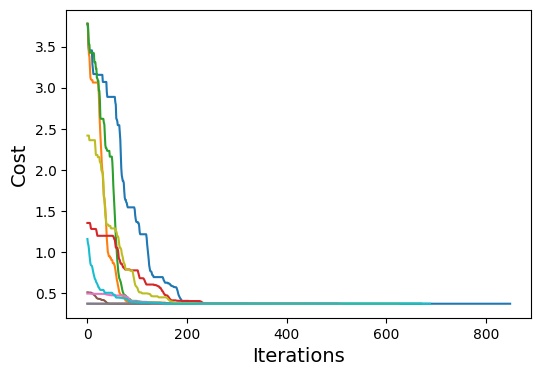

>>> KS cost function
2.425977960765353 0.9970129292672756 98.88 0.53 8.440112013289333 0.3953131361265945


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


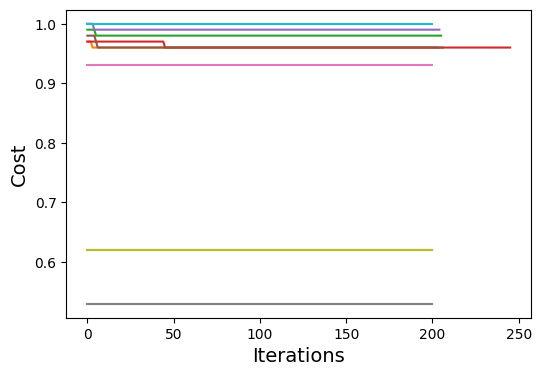

>>> KS_t cost function
2.5885000464404953 0.9970087759479961 99.8 0.43 5.709446128869583 0.37833207120764895


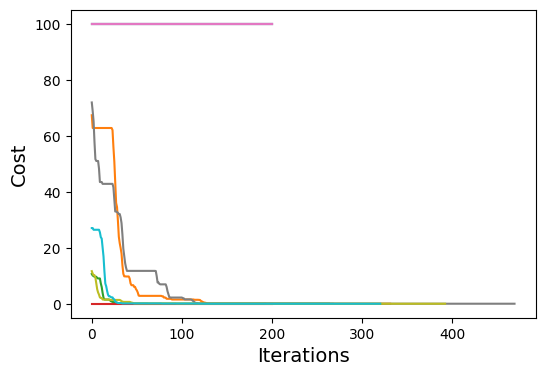

>>> KS_t_HD cost function
2.6763598248543614 0.9970085234048397 99.52 0.29 10.049050784331392 0.3746917955458211


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


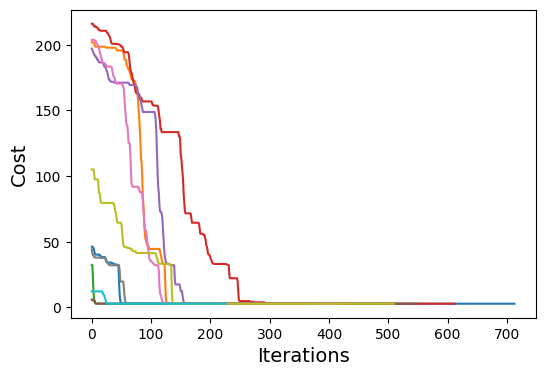

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.744492764802348 0.9895134621023817 86.36 0.28 12.310715703510963 0.44522073420177427
>>> A2 cost function
2.4705584390857993 0.9894844713867614 82.96 0.27 9.67499649144782 0.44929174788727533


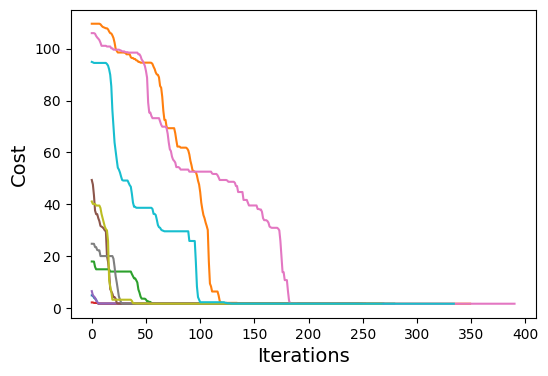

>>> HD cost function
3.402172403376891 0.9901993218689751 65.88000000000001 0.79 74.36057262803138 0.40682162467119753


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


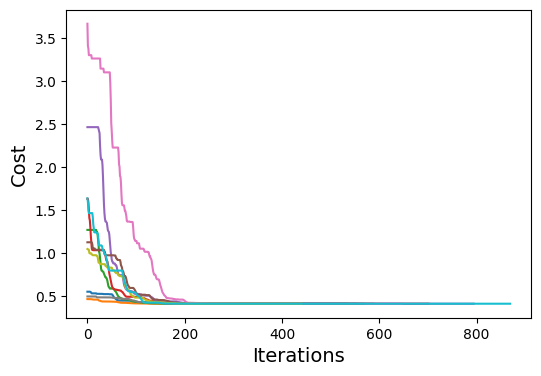

>>> KS cost function
2.4819829203864794 0.9894957550284372 84.36 0.25 10.658357895997122 0.44767045683680023


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


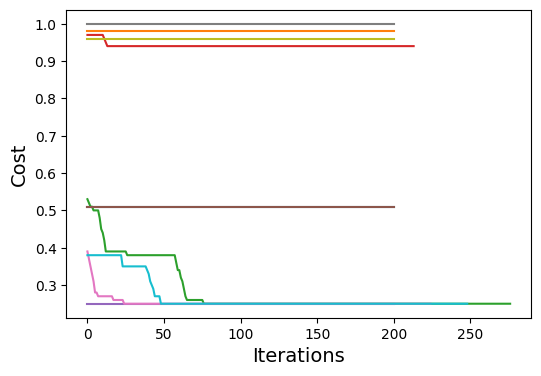

>>> KS_t cost function
2.768658316762847 0.989761472018763 98.8 0.55 36.90540703435523 0.42071723492182916


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


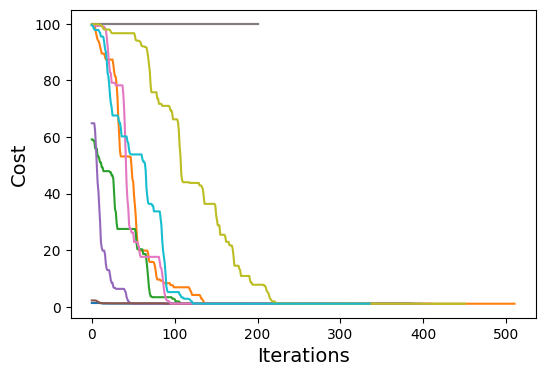

>>> KS_t_HD cost function
2.5630529923867593 0.9895745035239681 92.75999999999999 0.36 17.766510361341663 0.43759651285621237


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


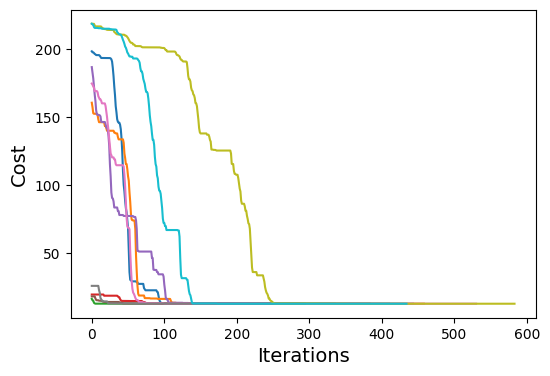

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.7491013003222315 0.9920307337214707 94.16 0.41 10.532854079941972 0.3327445117597287
>>> A2 cost function
2.8672322079671937 0.992064903687116 96.2 0.23 2.864784452053065 0.26816185389279035


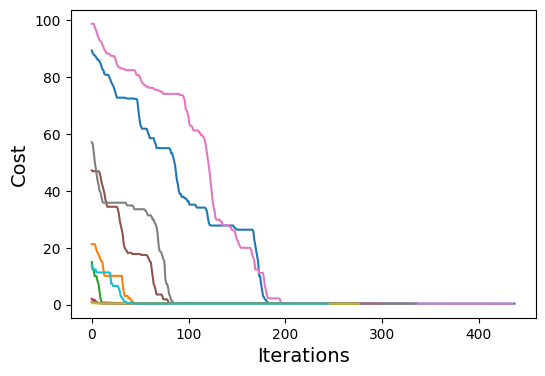

>>> HD cost function
2.9510861449123036 0.9920859911941208 93.4 0.3 6.620952295519327 0.26646517549158844


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


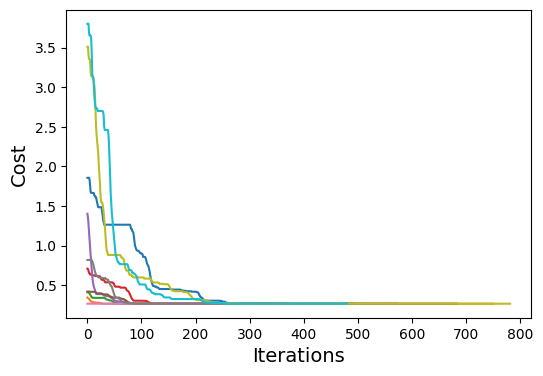

>>> KS cost function
2.7743147712266323 0.9920465455053663 98.04 0.15 1.0126350667957635 0.2746736872686383


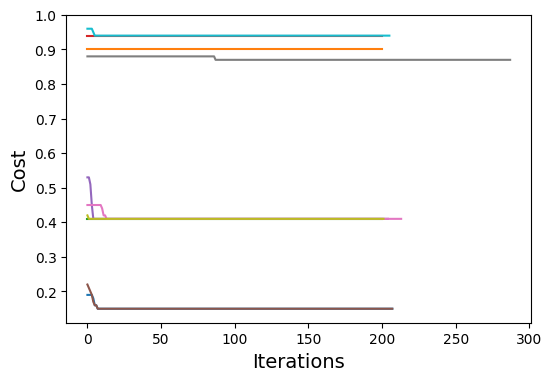

>>> KS_t cost function
2.671103469025818 0.9920332646831499 98.68 0.26 0.7580150064860516 0.2889422612510273


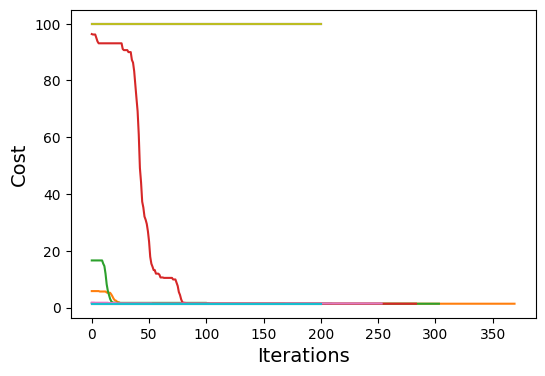

>>> KS_t_HD cost function
2.7491586515372166 0.9920425793125017 98.52 0.17 0.5891170549156896 0.277415057337445


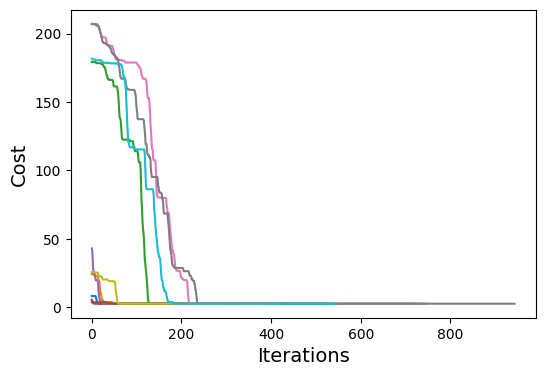

2.483814582625407 0.9875913661992963 95.8 0.23 0.7124393846379822 0.3036913943801444
>>> A2 cost function
2.729446410368329 0.9878080038542285 80.56 0.23 3.6547478862179137 0.30233448994172296


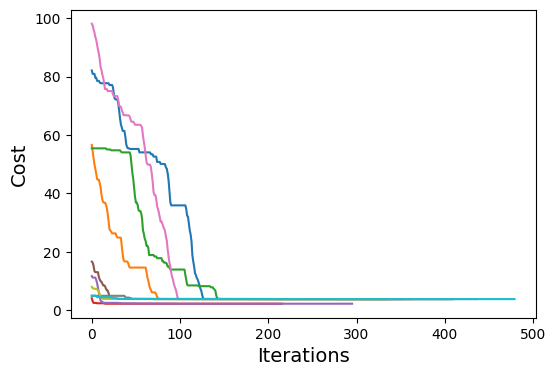

>>> HD cost function
2.6160466774479154 0.9877001935693466 89.64 0.23 1.4970961726838614 0.29880222882128926


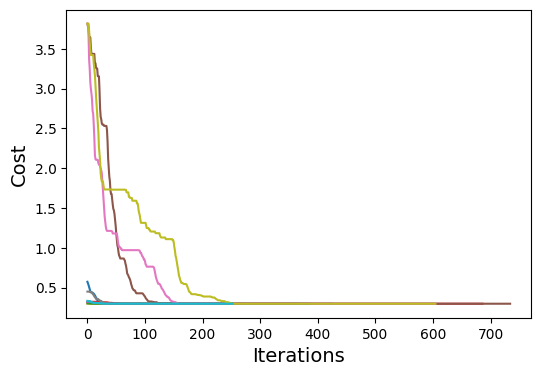

>>> KS cost function
2.6969923904558324 0.9877770938969572 83.2 0.21 2.5895020457840783 0.3006761632637333


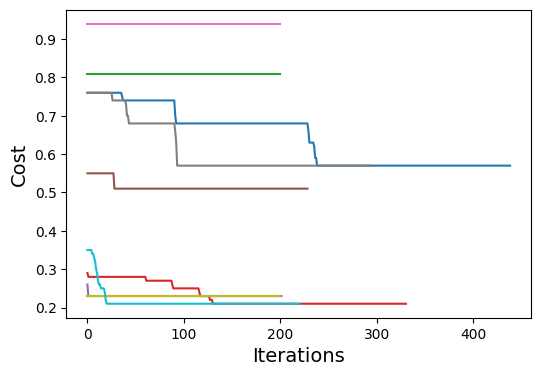

>>> KS_t cost function
2.3984998493555496 0.9874988732104159 98.04 0.31 3.202744352677134 0.31805430570046234


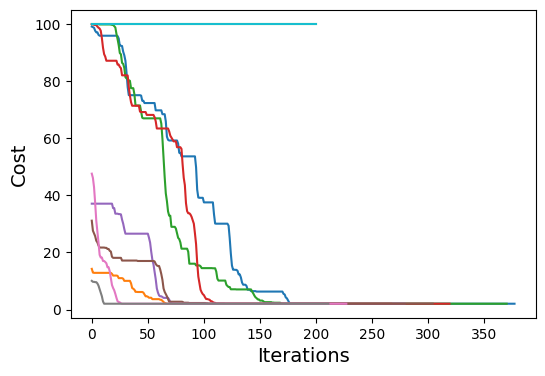

>>> KS_t_HD cost function
2.4576550795886587 0.9875523876613694 97.32 0.25 1.4832687529958577 0.30836332101786607


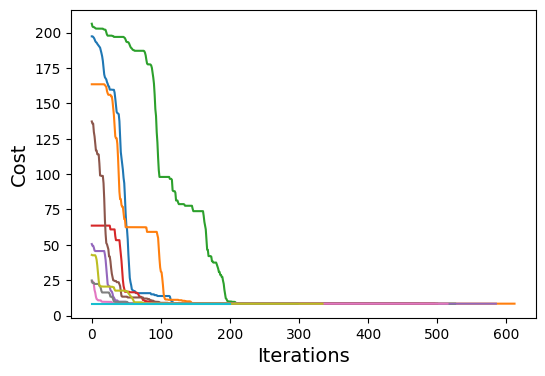

2.5044237848374706 0.9975074046423706 99.6 0.27 1.0135964771578285 0.36330119140023087
>>> A2 cost function
2.6628819392893166 0.997466224613675 99.56 0.23 4.2475668612855015 0.35882029074549837


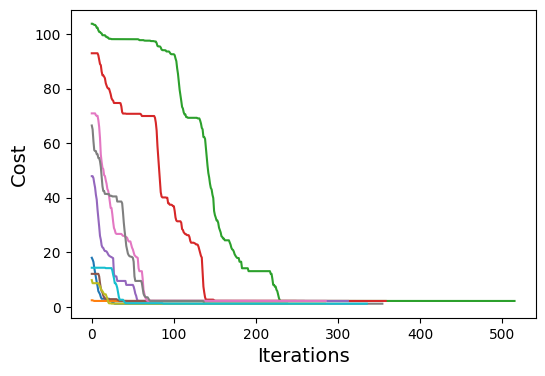

>>> HD cost function
2.6357046868525424 0.9974730272167914 99.68 0.21 3.336162789917104 0.35866907990878966


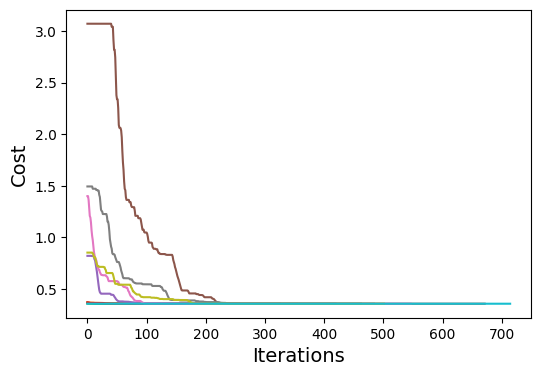

>>> KS cost function
2.5982624339694227 0.9974824452753843 99.76 0.17 2.525036866837318 0.35898043586752504


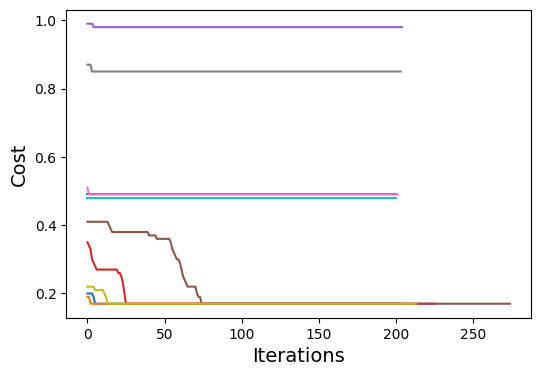

>>> KS_t cost function
2.5446689050178524 0.9974960159578325 99.83999999999999 0.21 1.2563407046891062 0.3606390073517364


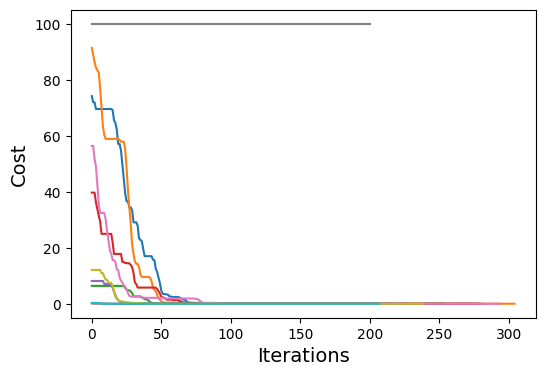

>>> KS_t_HD cost function
2.651212615340067 0.9974691420108669 99.64 0.22 3.7950813714753995 0.3587190459728869


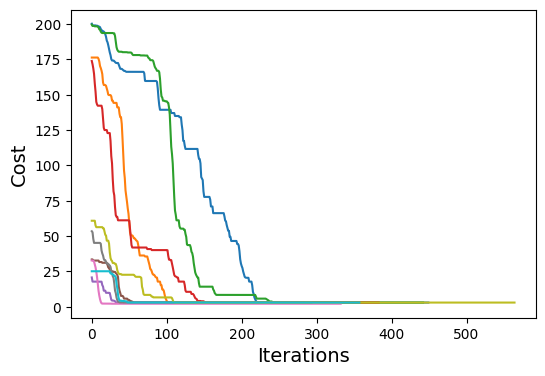

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.4233825078867324 0.991561728788189 97.56 0.34 15.879017696485029 0.39493627633152334
>>> A2 cost function
2.387209256938426 0.9915082489872189 99.03999999999999 0.26 5.164295394162104 0.40379430998121313


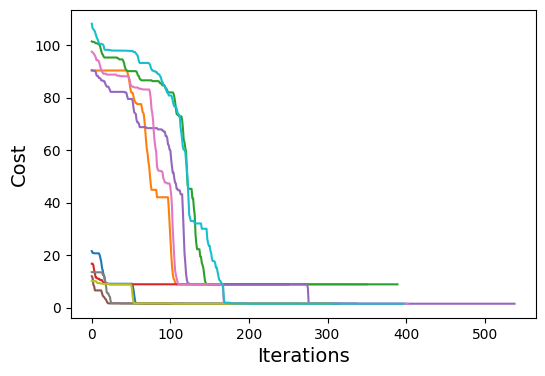

>>> HD cost function
2.7235681775498835 0.9916877806295262 83.2 0.54 36.57042053585249 0.38954159648525927


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


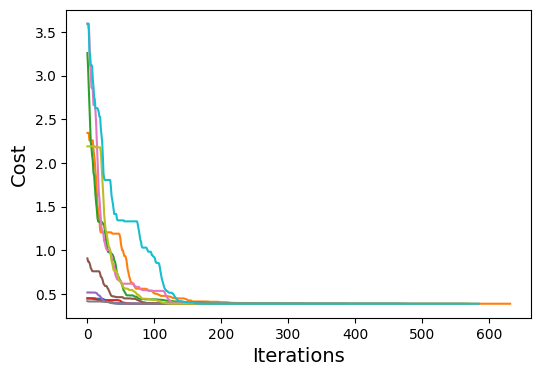

>>> KS cost function
2.365438383274375 0.9914990883706195 99.16 0.25 4.072172307490038 0.4062016349765758


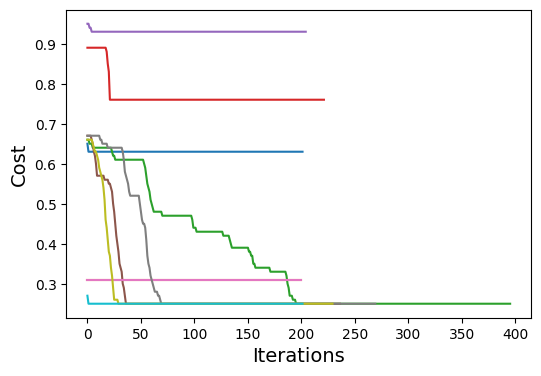

>>> KS_t cost function
2.363299177799957 0.9914982114453462 99.16 0.25 3.9888326941052905 0.4064523068942837


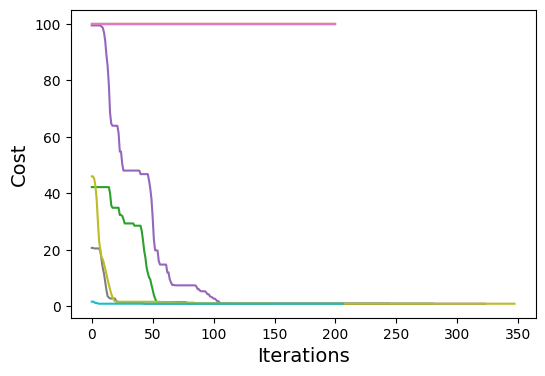

>>> KS_t_HD cost function
2.3875887368848203 0.9915084123863346 99.03999999999999 0.26 5.164295394162104 0.4037546087043527


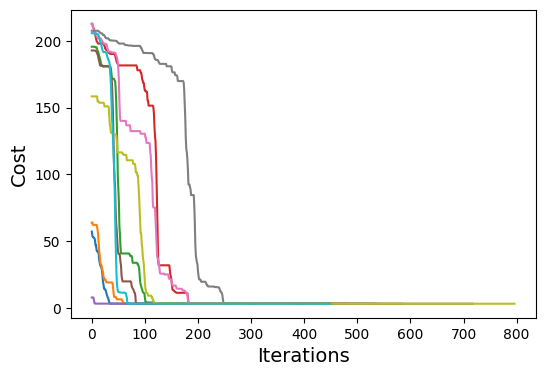

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.5500350938439302 0.986927664087259 97.52 0.41 6.786552365427421 0.2650766375105447
>>> A2 cost function
2.7450628258814316 0.987170692491797 83.67999999999999 0.29 1.5897562476767595 0.2527748780056107


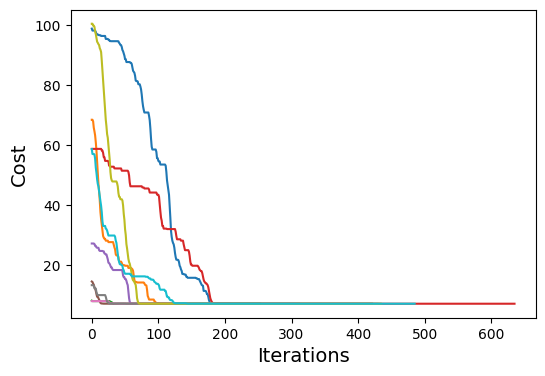

>>> HD cost function
2.6700221344036086 0.9870960238299008 90.28 0.29 1.7476292026589033 0.2506113611570529


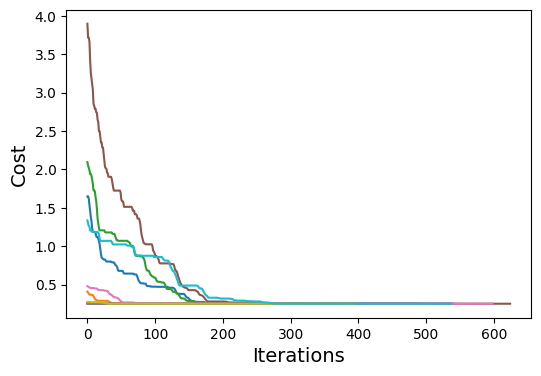

>>> KS cost function
2.615741692907103 0.9870420546271342 93.12 0.29 2.629851011997259 0.2519251402229526


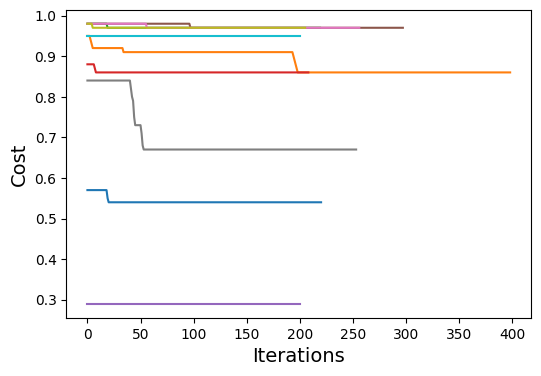

>>> KS_t cost function
2.421965091997432 0.9868515478956672 98.2 0.41 8.65083208064104 0.2834868195698147


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


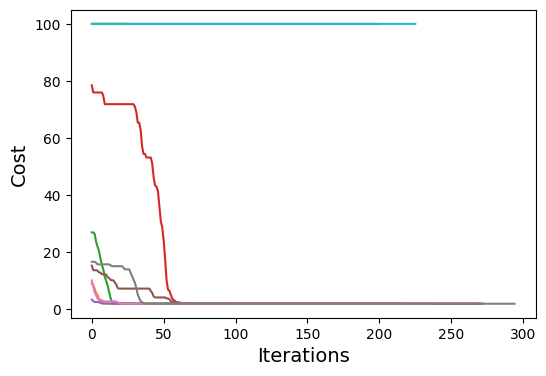

>>> KS_t_HD cost function
2.5931684788751905 0.987019651604921 94.19999999999999 0.31 3.219797475329998 0.253309214707094


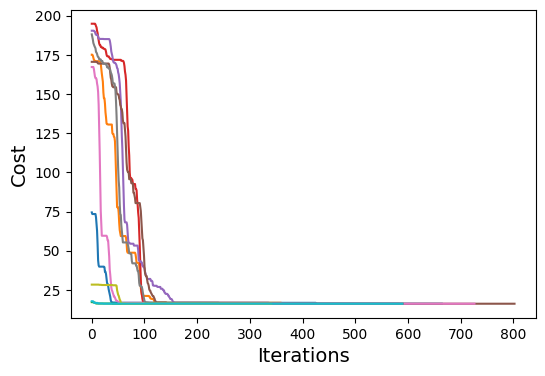

2.509363455228458 0.9909004426047279 99.24 0.24 3.2492634249168955 0.3474641556555279
>>> A2 cost function
2.4026504392278127 0.9908145544929311 98.6 0.19 0.8241934352653691 0.36061731519133716


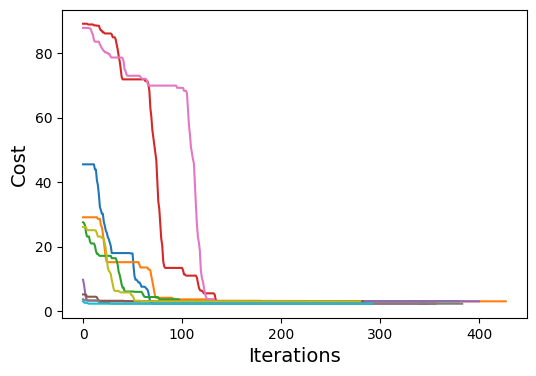

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.72097025970132 0.9910992966375762 94.28 0.38 15.793900197943357 0.3376196014071473


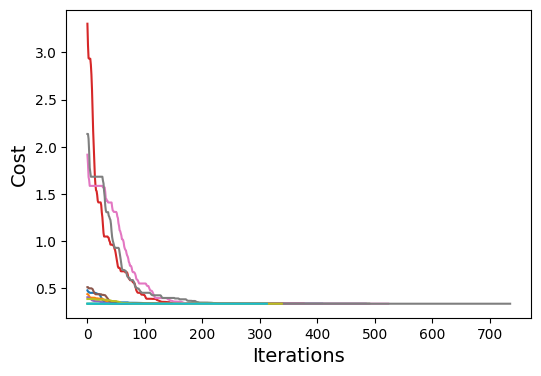

>>> KS cost function
2.4357369547218526 0.9908434941605535 98.92 0.19 1.4489476751689931 0.3553579772403338


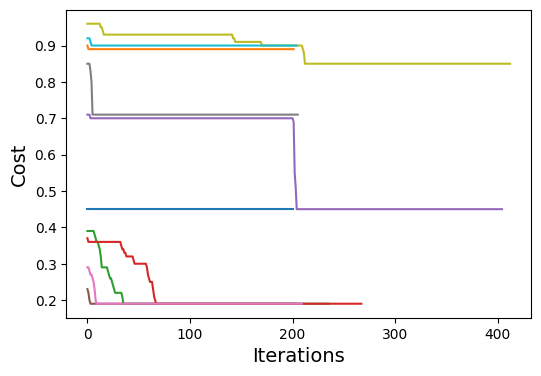

>>> KS_t cost function
2.4697450043440647 0.9908735263616884 99.4 0.21 2.2778707259338247 0.3508223862589991


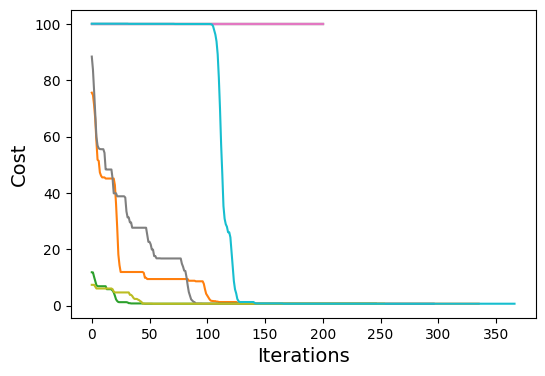

>>> KS_t_HD cost function
2.450323766314697 0.9908563433972046 99.24 0.19 1.719598381961964 0.3533092353090576


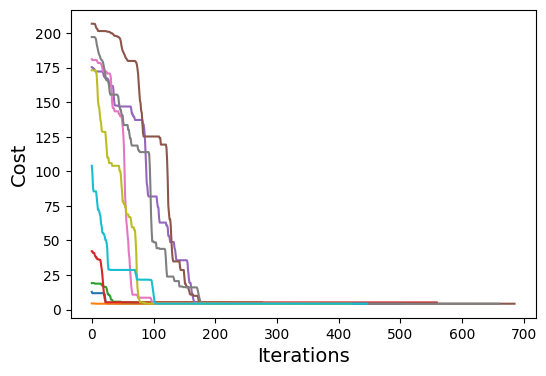

2.6523420807823364 0.9951612476425233 98.24000000000001 0.34 2.357197703018535 0.376602613550356
>>> A2 cost function
2.7720762464703954 0.9952552119904993 98.52 0.22 4.541037755745985 0.34914721753196987


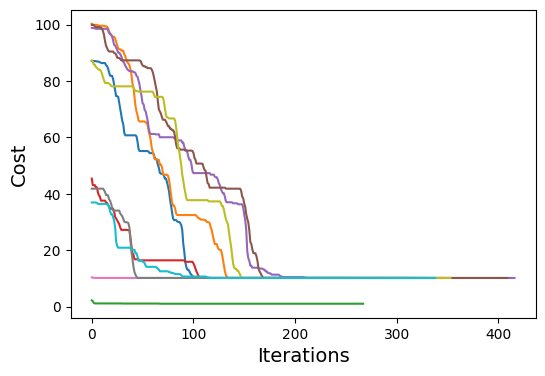

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.865587823955037 0.9952880590365184 96.64 0.27 9.722954631809298 0.3477395868289099


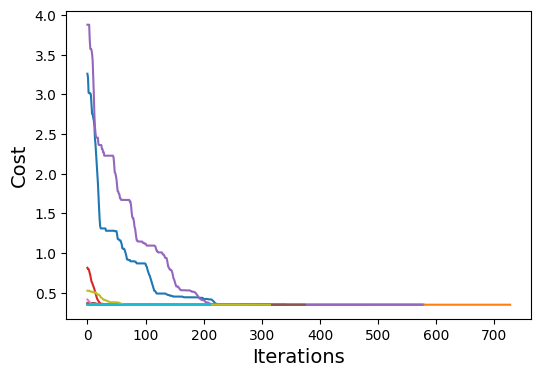

>>> KS cost function
2.7700021921778863 0.9952544829411951 98.52 0.22 4.296784048598088 0.34921365565266244


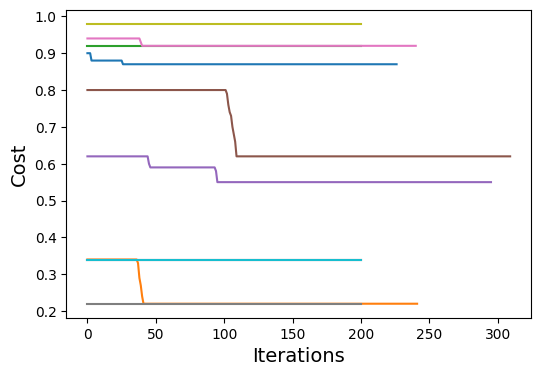

>>> KS_t cost function
2.6805076284731215 0.9952231021325227 99.56 0.34 2.9092682645520695 0.35382943847085685


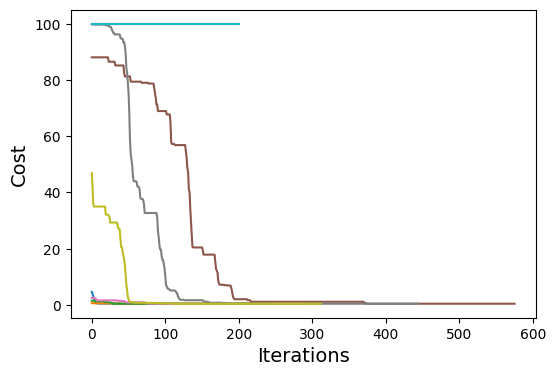

>>> KS_t_HD cost function
2.7506597043110896 0.9952476858166636 98.92 0.23 3.6343494964012413 0.34991570353415136


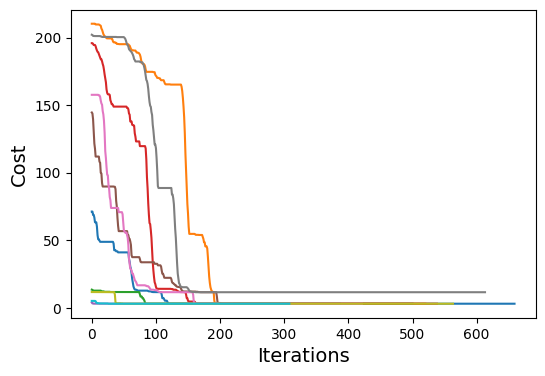

time: 2h 42min 11s (started: 2023-06-28 12:55:44 -03:00)


In [20]:
learning_rate = 0.02
max_iterations = 1000
momentum=0.3
n_seeds = 10



n = 10
metrics = ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']
metric_results = np.zeros((n, 6, 6))

alpha = 2.5
xmin = 1

for i in range(n):

  j = 0
  
  np.random.seed(i)
  r = np.random.uniform(0.0, 1.0, size=100)
  power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
  g = np.sort(power)

  fit = powerlaw.Fit(g, xmin=xmin)
  xmin = fit.xmin
  alpha_mle = fit.power_law.alpha
  r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha, xmin, ks_evaluation=True, plot=False)
  metric_results[i, j] = alpha_mle, r2, ks_t, ks_d, A2, HD
  print(alpha_mle, r2, ks_t, ks_d, A2, HD)


  for metric in metrics: # ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']
    j += 1
    print('>>> ' + metric + ' cost function')
    results = alpha_estimator2(g, max_iterations, learning_rate, n_seeds,
                              fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
    alpha_history, x_min_history, cost_history = results
    
    alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
    x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
    r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha_sgd, x_min_sgd, ks_evaluation=True, plot=False, filename=metric+'_fitting.pdf')
    print(alpha_sgd, r2, ks_t, ks_d, A2, HD)
    metric_results[i, j] = alpha_sgd, r2, ks_t, ks_d, A2, HD
    plot_history(n_seeds, cost_history, max_iterations, metric+'_history.pdf')

In [22]:
mean_results = np.mean(metric_results, axis=0)

metric_text = ['MLE', 'SGD A2', 'SGD HD', 'SGD K-S d', 'SGD K-S t', 'SGD K-S t+HD']

for i in range(6):
  print(metric_text[i], end=' & ')
  for j in range(np.size(mean_results[i])):
    if j != np.size(mean_results[i])-1:
      print(str("%.3f" % mean_results[i][j]), end=' & ')
    else:
      print(str("%.3f" % mean_results[i][j]), end=' \\\ \\hline \n ')

MLE & 2.583 & 0.992 & 96.680 & 0.341 & 6.380 & 0.362 \\ \hline 
 SGD A2 & 2.635 & 0.992 & 93.828 & 0.246 & 4.900 & 0.351 \\ \hline 
 SGD HD & 2.822 & 0.992 & 90.912 & 0.375 & 18.880 & 0.342 \\ \hline 
 SGD K-S d & 2.578 & 0.992 & 95.368 & 0.251 & 4.255 & 0.353 \\ \hline 
 SGD K-S t & 2.553 & 0.992 & 99.124 & 0.323 & 7.102 & 0.355 \\ \hline 
 SGD K-S t+HD & 2.591 & 0.992 & 97.888 & 0.254 & 5.331 & 0.351 \\ \hline 
 time: 0 ns (started: 2023-06-28 15:42:30 -03:00)


### Evaluating optimizations with execution time

In [15]:
from IPython import display

time: 0 ns (started: 2023-06-23 09:58:22 -03:00)


In [42]:
learning_rate = 0.05
max_iterations = 500
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

1 Single 0.8200321197509766
1 Multi 2.4526801109313965
1 Single 0.8739941120147705
1 Multi 2.2499656677246094
1 Single 0.7556602954864502
1 Multi 2.188908815383911
1 Single 0.8055992126464844
1 Multi 2.329618453979492
1 Single 0.8289251327514648
1 Multi 2.251711130142212
1 Single 0.8543548583984375
1 Multi 2.190129518508911
1 Single 0.7624480724334717
1 Multi 2.1574816703796387
1 Single 0.8257756233215332
1 Multi 2.3541719913482666
1 Single 0.8152716159820557
1 Multi 2.43230938911438
1 Single 0.9465150833129883
1 Multi 2.2179770469665527
2 Single 1.5871541500091553
2 Multi 2.5389201641082764
2 Single 1.6432225704193115
2 Multi 2.482330799102783
2 Single 1.5315301418304443
2 Multi 2.4201042652130127
2 Single 1.7767469882965088
2 Multi 2.548147439956665
2 Single 1.561147928237915
2 Multi 2.492271900177002
2 Single 1.560053825378418
2 Multi 2.4853546619415283
2 Single 1.5659031867980957
2 Multi 2.5376667976379395
2 Single 1.6626102924346924
2 Multi 2.4503676891326904
2 Single 1.5795485973

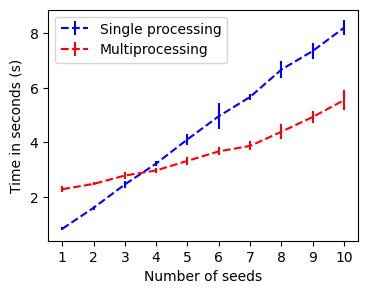

time: 156 ms (started: 2023-07-03 20:22:15 -03:00)


In [45]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')

ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.show()

In [46]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

1 Single 1.4865412712097168
1 Multi 2.91975736618042
1 Single 1.4704854488372803
1 Multi 2.797701120376587
1 Single 1.749741792678833
1 Multi 3.3580572605133057
1 Single 1.8347299098968506
1 Multi 3.1669580936431885
1 Single 1.6448330879211426
1 Multi 2.842386484146118
1 Single 1.4297010898590088
1 Multi 2.966602325439453
1 Single 1.4444115161895752
1 Multi 2.955836534500122
1 Single 1.4585163593292236
1 Multi 2.8429551124572754
1 Single 1.4319384098052979
1 Multi 2.856748342514038
1 Single 1.4401874542236328
1 Multi 2.800934314727783
2 Single 3.0549724102020264
2 Multi 3.289919137954712
2 Single 2.8789939880371094
2 Multi 3.0993704795837402
2 Single 3.0913825035095215
2 Multi 3.3552544116973877
2 Single 2.9276397228240967
2 Multi 3.2521233558654785
2 Single 3.1233580112457275
2 Multi 3.108401298522949
2 Single 2.995502471923828
2 Multi 3.255331039428711
2 Single 3.0138282775878906
2 Multi 3.22548770904541
2 Single 3.0403146743774414
2 Multi 3.3121516704559326
2 Single 3.38036084175109

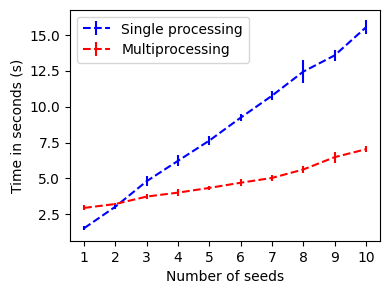

time: 172 ms (started: 2023-07-03 20:46:40 -03:00)


In [47]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')

ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.show()

In [52]:
learning_rate = 0.05
max_iterations = 50
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS_t'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = alpha_estimator2(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:656: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(P), S], midrank=True)[0]


1 Single 11.36610460281372
1 Multi 11.865104913711548
1 Single 10.325541019439697
1 Multi 11.658733606338501
1 Single 10.312756538391113
1 Multi 11.594953060150146
1 Single 10.261395931243896
1 Multi 12.4411780834198
1 Single 12.493001222610474
1 Multi 12.992573738098145
1 Single 11.195931434631348
1 Multi 11.92133092880249
1 Single 10.097379207611084
1 Multi 11.893183469772339
1 Single 10.616013050079346
1 Multi 12.099799156188965
1 Single 10.471288681030273
1 Multi 11.765389919281006
1 Single 10.655631065368652
1 Multi 13.205651044845581
2 Single 21.71924114227295
2 Multi 13.498826742172241
2 Single 21.060988426208496
2 Multi 13.185334205627441
2 Single 20.892655611038208
2 Multi 13.499622344970703
2 Single 22.62527871131897
2 Multi 13.577173471450806
2 Single 21.17272114753723
2 Multi 14.952935457229614
2 Single 21.872076511383057
2 Multi 13.257277011871338
2 Single 21.6483736038208
2 Multi 14.364122152328491
2 Single 21.524251461029053
2 Multi 14.258623600006104
2 Single 20.5100777

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:545: RuntimeWarning: overflow encountered in power
  power = lambda r: xmin*np.power((1-r),(-1/(alpha-1)), dtype=np.float64)# Equation D.4 from Clauset, 2009


5 Single 55.83634281158447
5 Multi 18.268919467926025
5 Single 55.51499271392822
5 Multi 18.81415033340454
5 Single 52.66882586479187
5 Multi 17.610880136489868
6 Single 64.48594808578491
6 Multi 20.613743543624878
6 Single 63.759663820266724
6 Multi 19.26431918144226
6 Single 62.79995942115784
6 Multi 20.140888214111328
6 Single 64.33622908592224
6 Multi 19.4747052192688
6 Single 64.45591449737549
6 Multi 19.95441198348999
6 Single 62.1207013130188
6 Multi 22.4197678565979
6 Single 63.91344165802002
6 Multi 19.200806856155396
6 Single 63.29231071472168
6 Multi 19.175196647644043
6 Single 65.28930735588074
6 Multi 19.456719398498535
6 Single 63.68095088005066
6 Multi 19.702660083770752
7 Single 75.28152680397034
7 Multi 21.536343336105347
7 Single 76.03165912628174
7 Multi 22.54501223564148
7 Single 76.53524208068848
7 Multi 22.073720455169678
7 Single 79.14448022842407
7 Multi 21.155240535736084
7 Single 75.39358472824097
7 Multi 22.625556230545044
7 Single 74.50943779945374
7 Multi 2

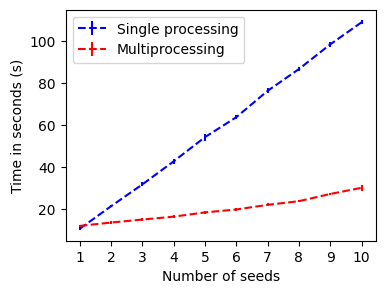

time: 219 ms (started: 2023-07-03 23:10:55 -03:00)


In [53]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.savefig('execution_time3_.pdf')
plt.show()

In [ ]:
# for i in range(n_seeds):
#   plt.plot(cost_history[i*max_iterations:i*max_iterations + max_iterations])
#   index = (i)*max_iterations + max_iterations-1
#   print(alpha_history[index], x_min_history[index], cost_history[index])

In [ ]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3
n_seeds = 100

set1 = np.where((angles2[:, 0] > 20) & (angles2[:, 0] <= 90) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set1 = angles2[set1 != np.array(None)]

results = alpha_estimator2(set1[:,1], max_iterations, learning_rate, n_seeds,
                              fix_x_min=None, metric = 'KS_t', multiprocessing=True, early_stopping=False)

alpha_history, x_min_history, cost_history = results
alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))

ax.tricontourf(x_min_history.flatten(),
             alpha_history.flatten(),
             cost_history.flatten(), 10,
             cmap='OrRd')

# ax.scatter(x_min_history.flatten(),
#             alpha_history.flatten(),
#             c=np.log10(cost_history.flatten()),
#           #  c='k',
#             cmap='OrRd') # 'copper'

# for i in range(n_seeds):
#   ax.plot(x_min_history[i],
#           alpha_history[i],
#           c='gray')

ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r"$\alpha$",fontsize=16)

plt.show()

## Estimating attribute distributions of synthetic data

In [10]:
alpha = 2.5
xmin = 1

time: 0 ns (started: 2023-06-26 11:05:54 -03:00)


In [11]:
learning_rate = 0.05
max_iterations = 100
momentum=0.3
n_seeds = 20

time: 0 ns (started: 2023-06-30 18:09:15 -03:00)


In [ ]:
n = 20
statistics_mle = []
statistics_sgd = []

metric = 'KS_t'

seed_random = 0
for alpha in [2.5]: # 1.7, 2.0, 2.3, 2.5
    for xmin in [1]:
        for i in range(0, n):
            r = np.random.default_rng(seed_random*2).uniform(0.00, 1.0, size=1000)
            power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
            g = np.sort(power)
            # g = generate_powerlaw_data(alpha, xmin, 100, random=True)
            
            fit = powerlaw.Fit(g, xmin=xmin)
#             xmin_mle = fit.xmin
            alpha_mle = fit.power_law.alpha
            r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha_mle, xmin, plot=False)
            statistics_mle.append((alpha_mle, xmin, r2, ks_t, ks_d, A2, HD))
#             print(alpha_mle, xmin_mle)
            print('alpha ' + str("%.2f" % alpha_mle) + ' R2: ' + str("%.2f" % r2) + ' ks_t: ' +  str("%.2f" % ks_t) +
                  ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
            
            results = alpha_estimator2(g, max_iterations, learning_rate, n_seeds,
                                      fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
            alpha_history, x_min_history, cost_history = results
            alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
            x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
#             alpha_sgd, x_min_sgd, cost_history, alpha_history, x_min_history = alpha_estimator(g, max_iterations, learning_rate, n_seeds, fix_x_min=1, metric=method)
            r2, ks_t, ks_d, A2, HD = powerlaw_fitting(g, alpha_sgd, xmin, plot=False)
            statistics_sgd.append((alpha_sgd, xmin, r2, ks_t, ks_d, A2, HD))
#             print(alpha_sgd, x_min_sgd)
            print('alpha ' + str("%.2f" % alpha_sgd) + ' R2: ' + str("%.2f" % r2) + ' ks_t: ' +  str("%.2f" % ks_t) +
                  ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
            seed_random+=1
            print()

In [ ]:
# print(np.asarray(statistics_mle)[:,0])
# print(np.asarray(statistics_sgd)[:,0])

D = (np.asarray(statistics_mle)[:,0], np.asarray(statistics_sgd)[:,0])

# plot
fig, ax = plt.subplots()
bp1 = ax.boxplot(np.asarray(statistics_mle)[:,0], positions=[2], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "gray", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "gray", "linewidth": 1.5},
                capprops={"color": "gray", "linewidth": 1.5})

bp2 = ax.boxplot(np.asarray(statistics_sgd)[:,0], positions=[4], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "gray", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "gray", "linewidth": 1.5},
                capprops={"color": "gray", "linewidth": 1.5})

# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['MLE', 'Ours'], loc='upper right')

ax.hlines(2.3, xmin=1, xmax=5, color='r', linestyles='--')

ax.set_xticklabels(['MLE', 'SGD'])
ax.set_ylabel(r'$\alpha$', fontsize=14)


ax.set(ylim=(2, 3), yticks=np.arange(1, 4, step=0.5))

plt.savefig('boxplot.pdf')

plt.show()

In [ ]:
mle_bias = []
sgd_bias = []
for i in range(n):
  print("\multirow{2}{*}{" + str(i+1) +"} ", end=' ')
  print("& MLE", end=' ')
  print("& %.3f" % statistics_mle[i][0], end=' ')
  bias = statistics_mle[i][0]-alpha
  mle_bias.append(bias)
  print("& %.3f" % bias, end=' ')

  for j in range(3, 7):
    print("& %.3f" % statistics_mle[i][j], end=' ')
  print("\\\ \cline{2-8}")

  ##########
  print("                    & SGD", end=' ')
  print("& %.3f" % statistics_sgd[i][0], end=' ')
  bias = statistics_sgd[i][0]-alpha
  sgd_bias.append(bias)
  print("& %.3f" % bias, end=' ')

  for j in range(3, 7):
    print("& %.3f" % statistics_sgd[i][j], end=' ')
  print("\\\ \hline \hline")


  # print(statistics_sgd[i])


In [20]:
def rmse(values, expected):
  rmse = np.sqrt(np.sum(np.power((np.asarray(values)-expected), 2)))
  return rmse

time: 16 ms (started: 2023-06-30 17:31:54 -03:00)


In [ ]:
print(np.mean(mle_bias), np.mean(np.abs(mle_bias)), rmse(mle_bias, 2.3))
print(np.mean(sgd_bias), np.mean(np.abs(sgd_bias)), rmse(sgd_bias, 2.3))


# Estimating attribute distributions of empirical data

In [10]:
learning_rate = 0.05
max_iterations = 100
momentum=0.3
n_seeds = 20

time: 0 ns (started: 2023-07-01 00:55:24 -03:00)


In [11]:
def plot_evaluation(data, set_name):

  metric_results = []
  

  rosechart(data[:, 0], filename=set_name +'rosechart.pdf')

  print('Estimating alpha and xmin with SGD')
  metric='KS_t'
  results = alpha_estimator2(data[:, 1], max_iterations, learning_rate, n_seeds,
                                      fix_x_min=None, metric = metric, multiprocessing=True, early_stopping=True)
  alpha_history, x_min_history, cost_history = results
  alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
  x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
  r2, ks_t, ks_d, A2, HD = powerlaw_fitting(data[:, 1], alpha_sgd, x_min_sgd, filename=set_name+'_sgd_'+metric+'.pdf')
  metric_results.append([alpha_sgd, x_min_sgd, ks_t, ks_d, A2, HD])
  print('alpha ' + str("%.2f" % alpha_sgd) + ' xmin: ' + str("%.2f" % x_min_sgd) + ' ks_t: ' +  str("%.2f" % ks_t) +
        ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
#   print((alpha_sgd, x_min_sgd, r2, ks_t, ks_d, A2, HD))

  print('Estimating alpha and xmin with Deluca2013/Corral2019')
  alpha_d, xmin_d = power_law_fitting_deluca(data[:, 1])
  r2, ks_t, ks_d, A2, HD = powerlaw_fitting(data[:, 1], alpha_d, xmin_d, filename=set_name+'_MLE_Deluca.pdf')
  metric_results.append([alpha_d, xmin_d, ks_t, ks_d, A2, HD])
  print('alpha ' + str("%.2f" % alpha_d) + ' xmin: ' + str("%.2f" % xmin_d) + ' ks_t: ' +  str("%.2f" % ks_t) +
        ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
#   print((alpha_d, xmin_d, r2, ks_t, ks_d, A2, HD))

  print('Estimating alpha and xmin with Clauset2009/Alstot2013')
  fit = powerlaw.Fit(set1[:, 1])
  alpha_mle = fit.power_law.alpha
  xmin_mle = fit.xmin
  r2, ks_t, ks_d, A2, HD = powerlaw_fitting(data[:, 1], alpha_mle, xmin_mle, filename=set_name+'_MLE_Clauset.pdf')
  metric_results.append([alpha_mle, xmin_mle, ks_t, ks_d, A2, HD])
  print('alpha ' + str("%.2f" % alpha_mle) + ' xmin: ' + str("%.2f" % xmin_mle) + ' ks_t: ' +  str("%.2f" % ks_t) +
        ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )

  return metric_results


time: 0 ns (started: 2023-07-01 00:55:25 -03:00)


## Dataset 1

Estimating alpha and xmin with SGD


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


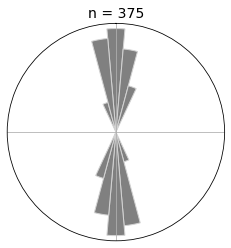

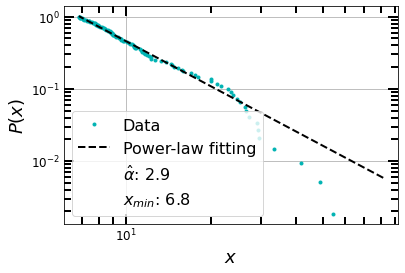

alpha 2.88 xmin: 6.80 ks_t: 99.76 ks_d: 0.36 A2: 9.47 HD: 0.29
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


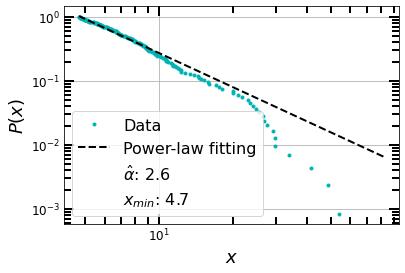

alpha 2.62 xmin: 4.68 ks_t: 97.04 ks_d: 0.36 A2: 28.93 HD: 0.28
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


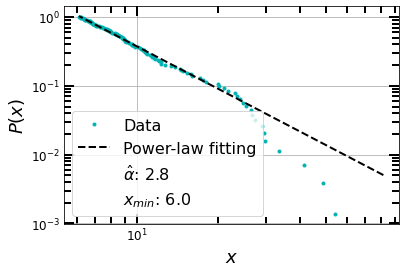

alpha 2.77 xmin: 6.05 ks_t: 99.24 ks_d: 0.37 A2: 16.89 HD: 0.30
time: 6min 24s (started: 2023-07-01 00:55:31 -03:00)


In [12]:
# Set N-S (0-20 e 160 a 180) (?0)
set1 = np.where((segm_group_angles[:, 0] <= 20) | (segm_group_angles[:, 0] > 160) & (segm_group_angles[:, 1] > 0),
         segm_group_angles[:, 0], None)

set1 = segm_group_angles[set1 != np.array(None)]

# print(set1[:,1])

results_NS = plot_evaluation(set1, 'N_S_')

Estimating alpha and xmin with SGD


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


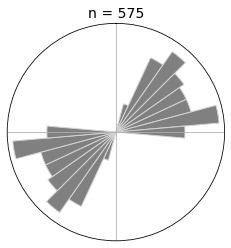

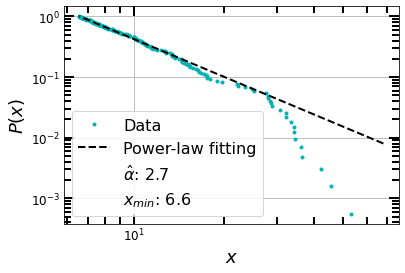

alpha 2.71 xmin: 6.56 ks_t: 99.88 ks_d: 0.43 A2: 29.63 HD: 0.27
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


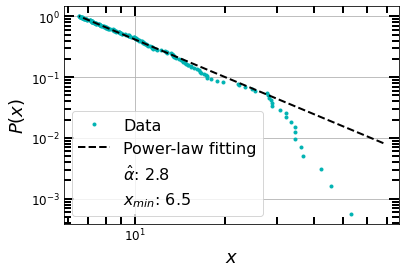

alpha 2.83 xmin: 6.51 ks_t: 99.20 ks_d: 0.37 A2: 23.29 HD: 0.25
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


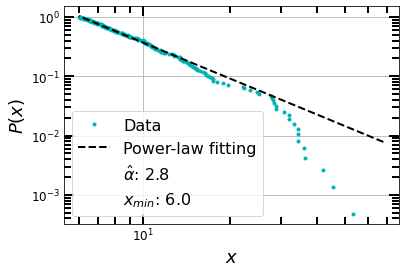

alpha 2.75 xmin: 5.98 ks_t: 98.68 ks_d: 0.38 A2: 29.03 HD: 0.21
time: 9min 42s (started: 2023-07-01 01:05:02 -03:00)


In [13]:
# Set NE-SW (20 a 90)
set1 = np.where((segm_group_angles[:, 0] > 20) & (segm_group_angles[:, 0] <= 90) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1 = segm_group_angles[set1 != np.array(None)]

results_NE_SW = plot_evaluation(set1, 'NE_SW_')

Estimating alpha and xmin with SGD


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


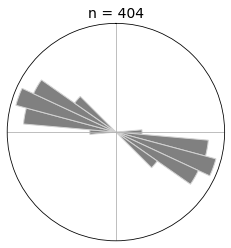

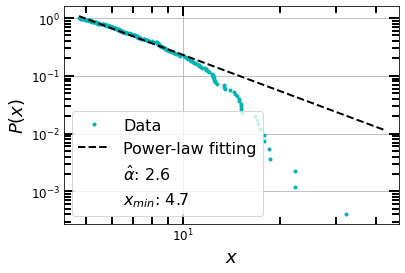

alpha 2.64 xmin: 4.74 ks_t: 95.20 ks_d: 0.63 A2: 68.87 HD: 0.29
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


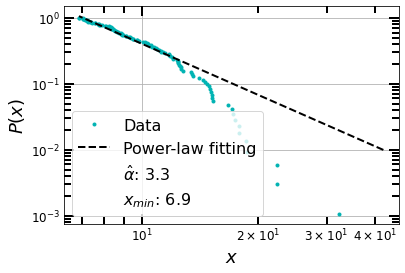

alpha 3.34 xmin: 6.88 ks_t: 90.36 ks_d: 0.45 A2: 18.97 HD: 0.25
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


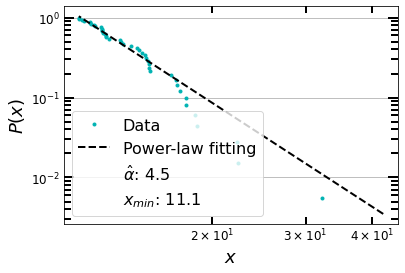

alpha 4.54 xmin: 11.10 ks_t: 99.12 ks_d: 0.30 A2: 0.85 HD: 0.32
time: 7min 50s (started: 2023-07-01 01:19:37 -03:00)


In [14]:
# Set ESE-WNW (90 a 130)
set1 = np.where((segm_group_angles[:, 0] > 90) & (segm_group_angles[:, 0] <= 130) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1 = segm_group_angles[set1 != np.array(None)]

results_ESE_WNN = plot_evaluation(set1, 'ESE_WNW_')


Estimating alpha and xmin with SGD


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


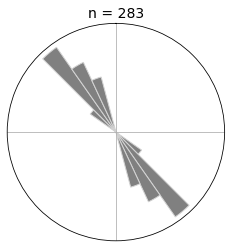

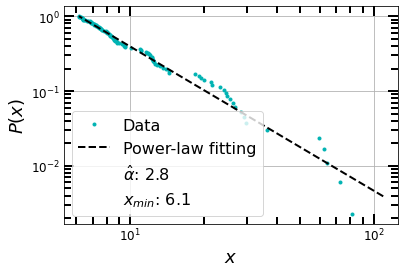

alpha 2.82 xmin: 6.11 ks_t: 99.68 ks_d: 0.28 A2: 8.04 HD: 0.35
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


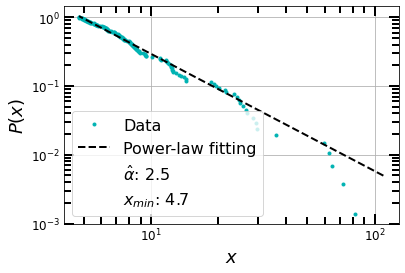

alpha 2.50 xmin: 4.75 ks_t: 97.68 ks_d: 0.27 A2: 10.18 HD: 0.32
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


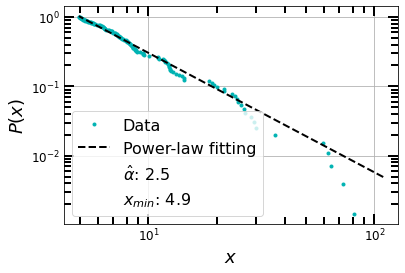

alpha 2.53 xmin: 4.92 ks_t: 97.96 ks_d: 0.27 A2: 10.06 HD: 0.32
time: 4min 47s (started: 2023-07-01 01:27:28 -03:00)


In [15]:
# Set SE-NO (130 a 160)
set1 = np.where((segm_group_angles[:, 0] > 130) & (segm_group_angles[:, 0] <= 160) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1 = segm_group_angles[set1 != np.array(None)]

results_SE_NO = plot_evaluation(set1, 'SE_NO_')


In [23]:
def print_empirical_results(results, direction):
  print("\multirow{3}{*}{" + direction +"} ", end=' ')
  for i in [2,1,0]:
    
    if i == 0:
      print(r"                      & SGD " + "", end=' ')
    if i == 1:
      print(r"                      & MLE²" + "", end=' ')
    if i == 2:
      print(r"& MLE¹" + "", end=' ')
    for j in [0,1,2,3,4,5]:
      print("& %.3f" % results[i][j], end=' ')
    if i !=0:
      print("\\\ \cline{2-8}")
  print("\\\ \hline \hline")

print_empirical_results(results_NS, 'N-S')
print_empirical_results(results_NE_SW, 'NE-SW')
print_empirical_results(results_ESE_WNN, 'ESE-WNW')
print_empirical_results(results_SE_NO, 'SE-NO')

\multirow{3}{*}{N-S}  & MLE¹ & 2.769 & 6.048 & 99.240 & 0.368 & 16.887 & 0.297 \\ \cline{2-8}
                      & MLE² & 2.621 & 4.684 & 97.040 & 0.364 & 28.929 & 0.284 \\ \cline{2-8}
                      & SGD  & 2.879 & 6.803 & 99.760 & 0.356 & 9.467 & 0.293 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.752 & 5.981 & 98.680 & 0.380 & 29.030 & 0.208 \\ \cline{2-8}
                      & MLE² & 2.826 & 6.514 & 99.200 & 0.369 & 23.288 & 0.249 \\ \cline{2-8}
                      & SGD  & 2.710 & 6.555 & 99.880 & 0.426 & 29.634 & 0.267 \\ \hline \hline
\multirow{3}{*}{ESE-WNW}  & MLE¹ & 4.541 & 11.105 & 99.120 & 0.302 & 0.853 & 0.322 \\ \cline{2-8}
                      & MLE² & 3.343 & 6.881 & 90.360 & 0.445 & 18.972 & 0.248 \\ \cline{2-8}
                      & SGD  & 2.640 & 4.740 & 95.200 & 0.633 & 68.866 & 0.287 \\ \hline \hline
\multirow{3}{*}{SE-NO}  & MLE¹ & 2.534 & 4.918 & 97.960 & 0.273 & 10.059 & 0.320 \\ \cline{2-8}
                      & MLE² & 2.504 & 4.746 & 

## Dataset 2

Estimating alpha and xmin with SGD


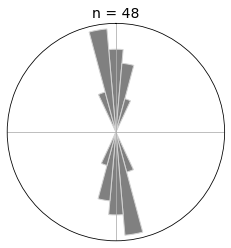

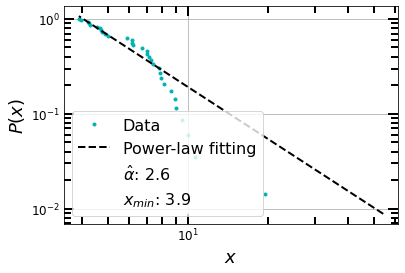

alpha 2.58 xmin: 3.86 ks_t: 98.04 ks_d: 0.33 A2: 1.25 HD: 0.43
Estimating alpha and xmin with Deluca2013/Corral2019


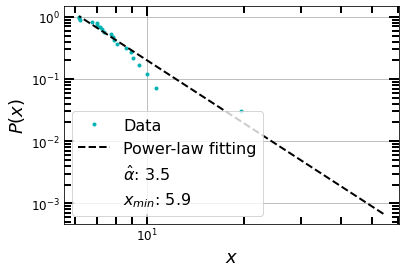

alpha 3.55 xmin: 5.90 ks_t: 97.64 ks_d: 0.67 A2: 5.57 HD: 0.58
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


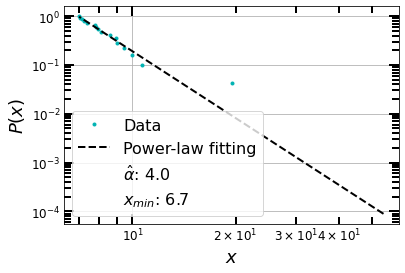

alpha 3.95 xmin: 6.74 ks_t: 98.80 ks_d: 0.71 A2: 5.45 HD: 0.63
time: 6min 41s (started: 2023-07-01 17:26:14 -03:00)


In [50]:
#
set1 = np.where((angles2[:, 0] <= 20) | (angles2[:, 0] > 160) & (angles2[:, 1] > 0),
         angles2[:, 0], None)

set1 = angles2[set1 != np.array(None)]
# rosechart_plot = rosechart(set1[:, 0])

results_2_S_N = plot_evaluation(set1, '_dataset2_S_N_')

Estimating alpha and xmin with SGD


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


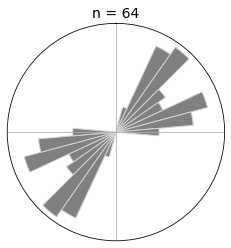

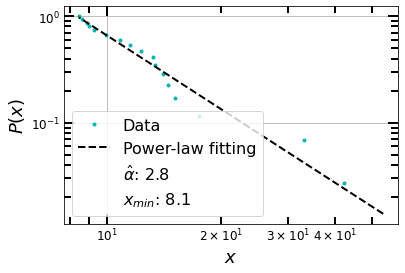

alpha 2.76 xmin: 8.14 ks_t: 99.88 ks_d: 0.28 A2: -0.47 HD: 0.47
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


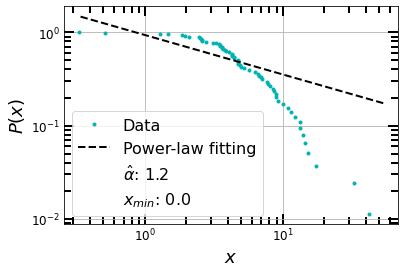

alpha 1.18 xmin: 0.02 ks_t: 0.00 ks_d: 0.89 A2: 49.70 HD: 1.25
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


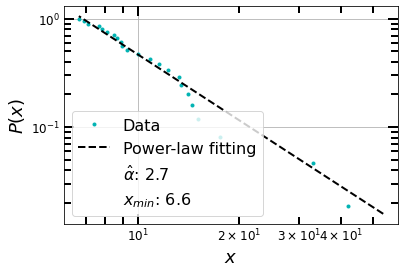

alpha 2.74 xmin: 6.64 ks_t: 99.56 ks_d: 0.29 A2: -0.18 HD: 0.40
time: 3min 30s (started: 2023-07-01 17:32:56 -03:00)


In [51]:
# Set NE-SW (20 a 90)
set1 = np.where((angles2[:, 0] > 20) & (angles2[:, 0] <= 90) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set1 = angles2[set1 != np.array(None)]

results_2_NE_SW = plot_evaluation(set1, '_dataset2_NE_SW_')

Estimating alpha and xmin with SGD


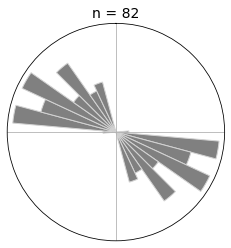

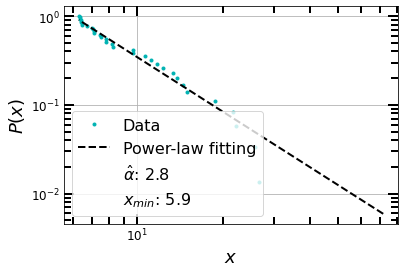

alpha 2.83 xmin: 5.90 ks_t: 99.92 ks_d: 0.41 A2: 1.23 HD: 0.51
Estimating alpha and xmin with Deluca2013/Corral2019


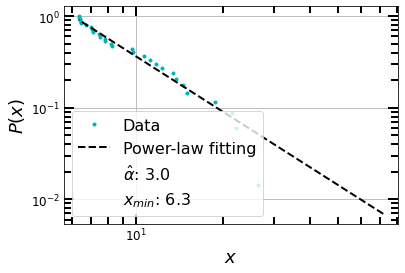

alpha 2.96 xmin: 6.28 ks_t: 99.88 ks_d: 0.48 A2: 2.61 HD: 0.51
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


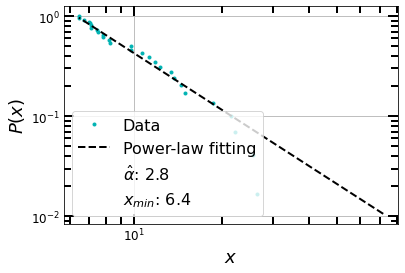

alpha 2.78 xmin: 6.39 ks_t: 99.72 ks_d: 0.41 A2: 0.89 HD: 0.48
time: 3min 48s (started: 2023-07-01 12:59:23 -03:00)


In [38]:
# Set NE-SW (20 a 90)
set1 = np.where((angles2[:, 0] > 90) & (angles2[:, 0] <= 160) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set1 = angles2[set1 != np.array(None)]

results_2_NO_SE = plot_evaluation(set1, '_dataset2_NO_SE_')

In [53]:
print_empirical_results(results_2_S_N, 'N-S')
print_empirical_results(results_2_NE_SW, 'NE-SW')
print_empirical_results(results_2_NO_SE, 'ESE-WNW')

\multirow{3}{*}{N-S}  & MLE¹ & 3.954 & 6.736 & 98.800 & 0.706 & 5.450 & 0.629 \\ \cline{2-8}
                      & MLE² & 3.549 & 5.896 & 97.640 & 0.667 & 5.565 & 0.578 \\ \cline{2-8}
                      & SGD  & 2.583 & 3.864 & 98.040 & 0.333 & 1.251 & 0.430 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.742 & 6.642 & 99.560 & 0.292 & -0.178 & 0.395 \\ \cline{2-8}
                      & MLE² & 1.180 & 0.019 & 0.000 & 0.889 & 49.703 & 1.250 \\ \cline{2-8}
                      & SGD  & 2.758 & 8.142 & 99.880 & 0.278 & -0.468 & 0.471 \\ \hline \hline
\multirow{3}{*}{ESE-WNW}  & MLE¹ & 2.785 & 6.386 & 99.720 & 0.414 & 0.889 & 0.480 \\ \cline{2-8}
                      & MLE² & 2.962 & 6.284 & 99.880 & 0.485 & 2.608 & 0.515 \\ \cline{2-8}
                      & SGD  & 2.833 & 5.901 & 99.920 & 0.412 & 1.228 & 0.513 \\ \hline \hline
time: 16 ms (started: 2023-07-01 17:54:12 -03:00)


## Dataset 3

Estimating alpha and xmin with SGD


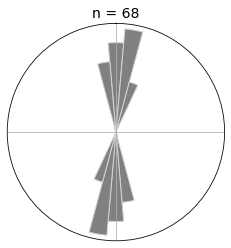

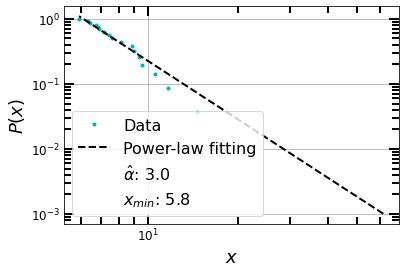

alpha 2.98 xmin: 5.78 ks_t: 99.64 ks_d: 0.61 A2: 2.89 HD: 0.57
Estimating alpha and xmin with Deluca2013/Corral2019


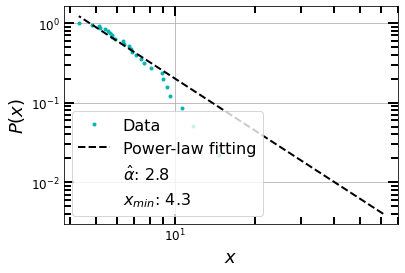

alpha 2.82 xmin: 4.31 ks_t: 91.44 ks_d: 0.59 A2: 4.28 HD: 0.49
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


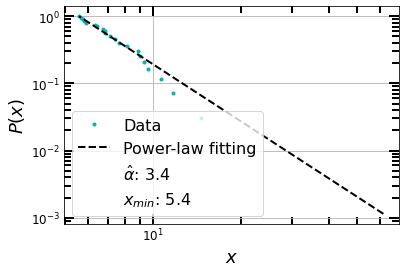

alpha 3.41 xmin: 5.43 ks_t: 99.68 ks_d: 0.68 A2: 6.04 HD: 0.56
time: 3min 41s (started: 2023-07-01 17:44:44 -03:00)


In [52]:
#
set1 = np.where((angles3[:, 0] <= 20) | (angles3[:, 0] > 160) & (angles3[:, 1] > 0),
         angles3[:, 0], None)

set1 = angles3[set1 != np.array(None)]
# rosechart_plot = rosechart(set1[:, 0])

results_3_S_N = plot_evaluation(set1, '_dataset3_S_N_')

Estimating alpha and xmin with SGD


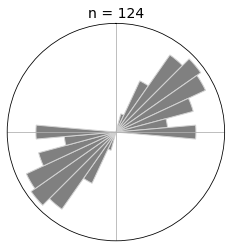

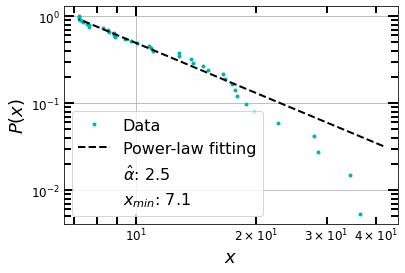

alpha 2.48 xmin: 7.09 ks_t: 99.88 ks_d: 0.38 A2: 3.51 HD: 0.40
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


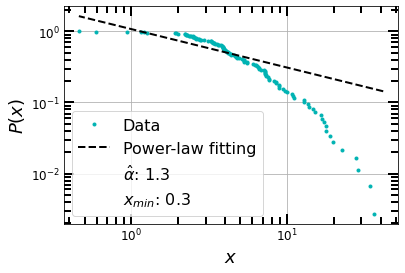

alpha 1.34 xmin: 0.26 ks_t: 0.00 ks_d: 0.80 A2: 69.03 HD: 0.98
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


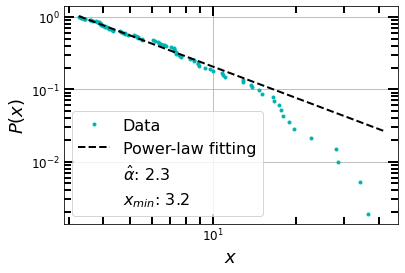

alpha 2.30 xmin: 3.24 ks_t: 97.00 ks_d: 0.35 A2: 7.95 HD: 0.25
time: 5min 11s (started: 2023-07-01 13:09:10 -03:00)


In [41]:
# Set NE-SW (20 a 90)
set1 = np.where((angles3[:, 0] > 20) & (angles3[:, 0] <= 90) & (angles3[:, 1] >0),
         angles3[:, 0], None)

set1 = angles3[set1 != np.array(None)]

results_3_NE_SW = plot_evaluation(set1, '_dataset3_NE_SW_')

Estimating alpha and xmin with SGD


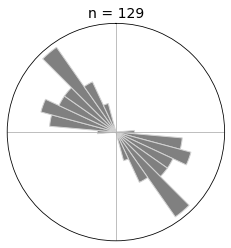

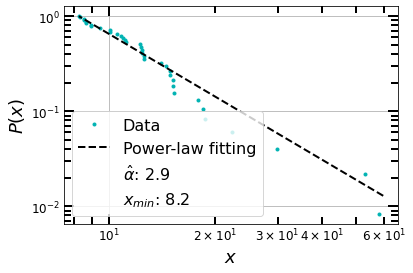

alpha 2.85 xmin: 8.18 ks_t: 98.80 ks_d: 0.41 A2: 2.36 HD: 0.38
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\adeju\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


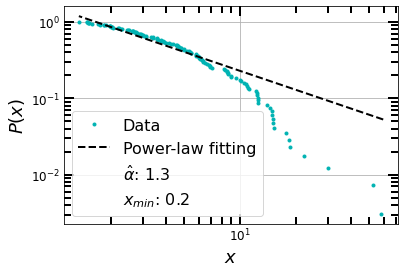

alpha 1.33 xmin: 0.25 ks_t: 0.00 ks_d: 0.88 A2: 104.70 HD: 1.43
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


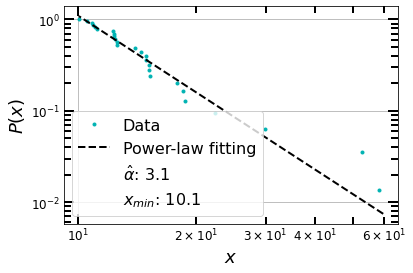

alpha 3.11 xmin: 10.08 ks_t: 98.32 ks_d: 0.48 A2: 4.02 HD: 0.37
time: 4min 18s (started: 2023-07-01 13:15:32 -03:00)


In [42]:
# Set NE-SW (20 a 90)
set1 = np.where((angles3[:, 0] > 90) & (angles3[:, 0] <= 160) & (angles3[:, 1] >0),
         angles3[:, 0], None)

set1 = angles3[set1 != np.array(None)]

results_3_NO_SE = plot_evaluation(set1, '_dataset3_NO_SE_')

In [43]:
print_empirical_results(results_3_S_N, 'N-S')
print_empirical_results(results_3_NE_SW, 'NE-SW')
print_empirical_results(results_3_NO_SE, 'ESE-WNW')

\multirow{3}{*}{N-S}  & MLE¹ & 3.413 & 5.433 & 99.680 & 0.682 & 6.038 & 0.558 \\ \cline{2-8}
                      & MLE² & 2.825 & 4.308 & 91.440 & 0.593 & 4.279 & 0.487 \\ \cline{2-8}
                      & SGD  & 2.196 & 2.150 & 99.360 & 0.807 & 52.782 & 0.453 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.302 & 3.242 & 97.000 & 0.348 & 7.951 & 0.255 \\ \cline{2-8}
                      & MLE² & 1.338 & 0.260 & 0.000 & 0.797 & 69.033 & 0.980 \\ \cline{2-8}
                      & SGD  & 2.478 & 7.085 & 99.880 & 0.375 & 3.510 & 0.398 \\ \hline \hline
\multirow{3}{*}{ESE-WNW}  & MLE¹ & 3.111 & 10.076 & 98.320 & 0.481 & 4.021 & 0.373 \\ \cline{2-8}
                      & MLE² & 1.333 & 0.246 & 0.000 & 0.883 & 104.700 & 1.427 \\ \cline{2-8}
                      & SGD  & 2.854 & 8.178 & 98.800 & 0.405 & 2.357 & 0.376 \\ \hline \hline
time: 0 ns (started: 2023-07-01 13:24:21 -03:00)
